In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
!pip install cmcrameri
from cmcrameri import cm
import datetime
from scipy.signal import savgol_filter
os.chdir('/users/marianne/documents/pe_snow_fires/ICB')

In [3]:
hobo = pd.read_csv('hoboA1.csv',header=1)
kh = hobo.keys()
hobo['dt']=pd.to_datetime(hobo[kh[1]])

station = pd.read_csv('TableA1.csv',header=0)
station['dt'] = pd.to_datetime(station['TIMESTAMP'])
ks = station.keys()
station_wy20 = station[station['dt']>hobo['dt'][0]]

C:\Users\Marianne\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,2,4,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 0, 'temp')

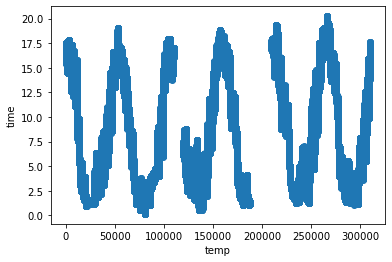

In [4]:
f,ax=plt.subplots()
ax.plot(station['T_Avg'],'o')
ax.set_ylabel('time')
ax.set_xlabel('temp')

Text(0.5, 0, 'intensity')

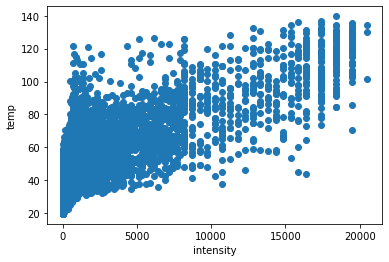

In [5]:
f,ax=plt.subplots()
ax.plot(hobo[kh[3]],hobo[kh[2]],'o')
ax.set_ylabel('temp')
ax.set_xlabel('intensity')

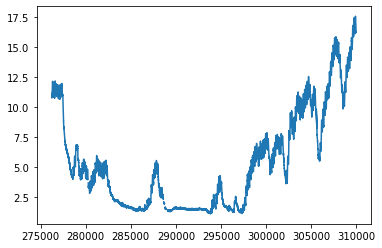

In [6]:
plt.plot(station_wy20['T_Avg'].astype('float'))

In [7]:
series=pd.Series(station_wy20['T_Avg'].astype('float'),index=station_wy20['dt'])

In [8]:
hobo_T=pd.Series(hobo[kh[2]])
hobo_T.index=hobo['dt']
station_T=pd.Series(station_wy20['AirTC_Avg'])
station_T.index = station_wy20['dt']

In [9]:
station_hourly = station_T.resample('1H').bfill()
hobo_hourly = hobo_T.resample('1H').bfill()
station_daily = station_T.resample('24H').bfill()
hobo_daily = hobo_T.resample('24H').bfill()

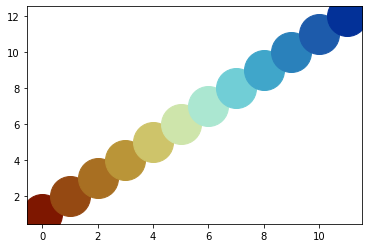

In [10]:
fig,ax=plt.subplots()
for i,val in enumerate(cm.roma(np.linspace(0,1,12))):
    ax.plot(i,i+1, 'o',markersize=40,color=val)

In [11]:
hourly_temps = pd.DataFrame(hobo_hourly).join(pd.DataFrame(station_hourly))
hourly_temps.columns=['hobo','station']
daily_temps = pd.DataFrame(hobo_daily).join(pd.DataFrame(station_daily))
daily_temps.columns=['hobo','station']


In [12]:
hourly_temps['hobo c'] = (hourly_temps['hobo'] - 32) / 1.8  
hourly_temps['difference'] = hourly_temps['station'].astype('float')-hourly_temps['hobo c']
series=pd.Series(station_wy20['AirTC_Avg'].astype('float'))

daily_temps['hobo c'] = (daily_temps['hobo'] - 32) / 1.8  
daily_temps['difference'] = daily_temps['station'].astype('float')-daily_temps['hobo c']

In [13]:
camera = pd.read_csv('snow_summaryA.csv',header=2)
camera['dt'] = pd.to_datetime(camera['Date'])
camera_wy20 = camera[camera['dt']>hobo['dt'][0]]
camera_wy20.index = camera_wy20['dt']


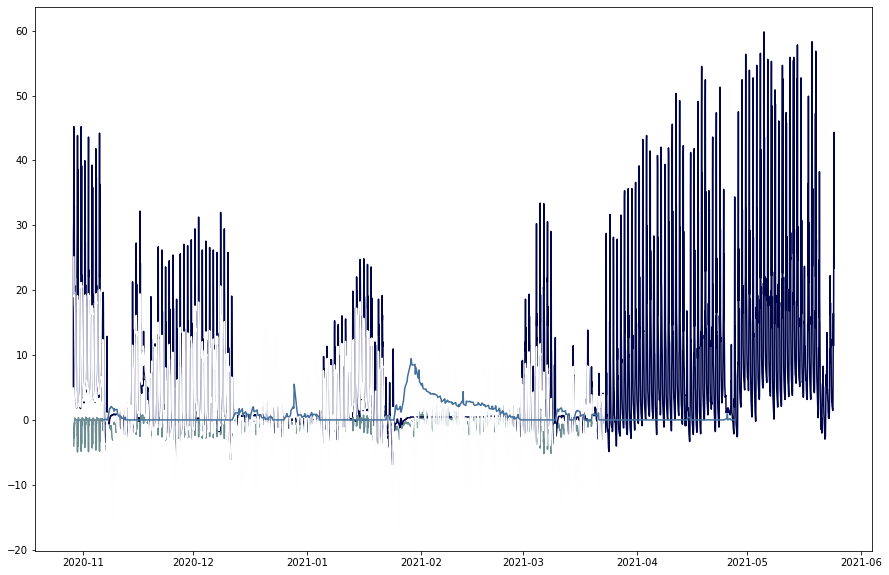

In [14]:
cols = cm.davos(np.linspace(0,1,7))
f,ax=plt.subplots(figsize=(15,10))
ax.plot(hourly_temps['difference']/5,'-',color=cols[3])

ax.plot(hourly_temps['hobo c'].astype('float'),color=cols[0])
ax.plot(hourly_temps['station'].astype('float'),color=cols[6])
ax.plot(camera_wy20['Snow Depth (mm)']/100,color=cols[2])

LinAlgError: SVD did not converge in Linear Least Squares

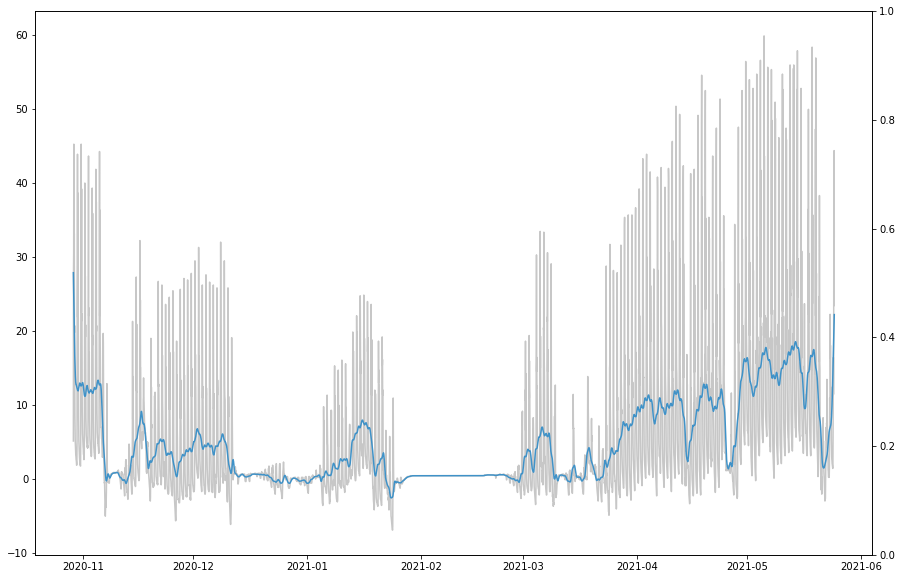

In [15]:
cols = cm.bukavu(np.linspace(0,1,5))


y = hourly_temps['hobo c'].astype('float')
x = hourly_temps.index
smooth = savgol_filter(y, window_length = 25, polyorder = 1)
smooth = savgol_filter(smooth, window_length = 11, polyorder = 1)
f,ax=plt.subplots(figsize=(15,10))
ax2=ax.twinx()
ax.plot(x,y,color=cm.grayC(50),label='hobo hourly')
ax.plot(x,smooth,color=cols[1],label='hobo smoothed')
smooth_station = savgol_filter(hourly_temps['station'].astype('float'), window_length = 25, polyorder = 1)
tmp =  smooth_station - smooth
ax.plot(x,smooth_station,color=cols[2],label='station smoothed')
ax.plot(x,tmp, color=cm.bilbao(255),label = 'difference smooth')
ax2.plot(camera_wy20['Snow Depth (mm)'],'-',color=cm.oslo(50),label='snow depth')
ax.set_ylabel('degrees C')
ax2.set_ylabel('Snow depth [mm]')
ax.legend()
ax2.legend(loc = 'lower right')

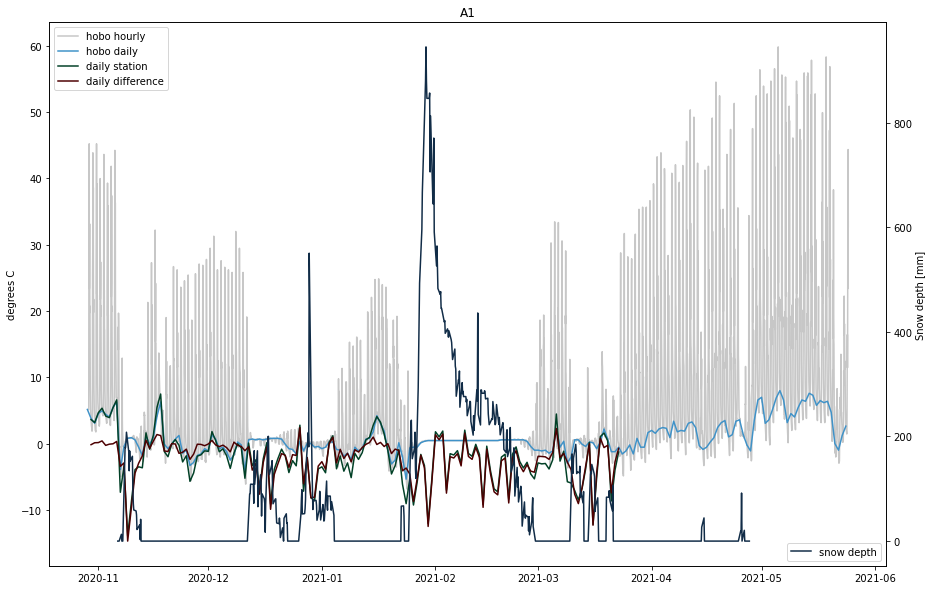

In [16]:
cols = cm.bukavu(np.linspace(0,1,5))
y = daily_temps['hobo c'].astype('float')
x = daily_temps.index

f,ax=plt.subplots(figsize=(15,10))
ax2=ax.twinx()
ax.plot(hourly_temps.index,hourly_temps['hobo c'],color=cm.grayC(50),label='hobo hourly')
ax.plot(x,y,color=cols[1],label='hobo daily')
daily_station = daily_temps['station'].astype('float') #  savgol_filter(hourly_temps['station'].astype('float'), window_length = 1, polyorder = 1)
tmp =  daily_station - y
ax.plot(x,daily_station,color=cols[2],label='daily station')
ax.plot(x,tmp, color=cm.bilbao(255),label = 'daily difference')
ax2.plot(camera_wy20['Snow Depth (mm)'],'-',color=cm.oslo(50),label='snow depth')
ax.set_ylabel('degrees C')
ax2.set_ylabel('Snow depth [mm]')
ax.legend()
ax2.legend(loc = 'lower right')
ax.set_title('A1')
plt.savefig("snow_temp_a1_air.jpg", dpi=300)

C:\Users\Marianne\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,2,4,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


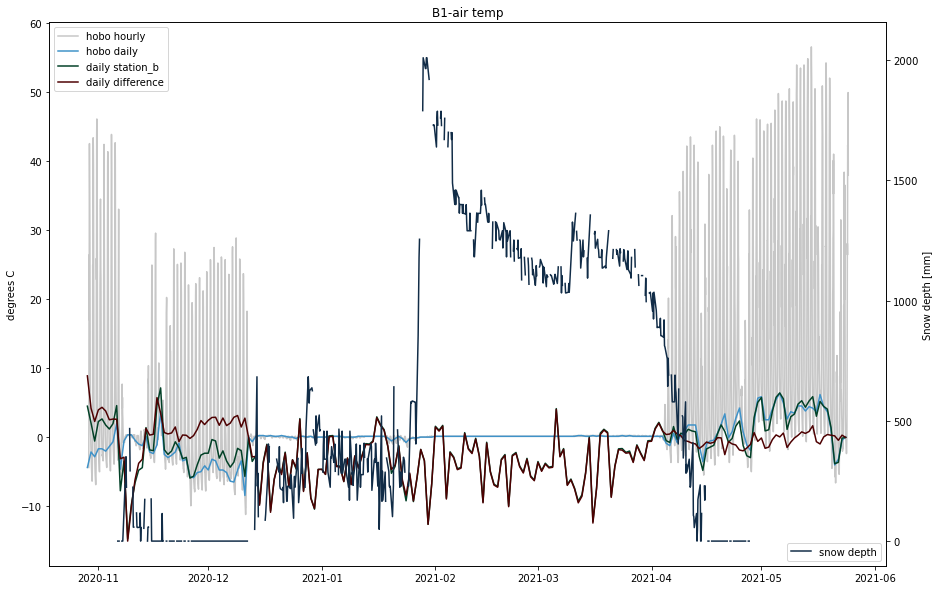

In [17]:

hobo_b = pd.read_csv('hoboB1.csv',header=1)
kh = hobo_b.keys()
hobo_b['dt']=pd.to_datetime(hobo_b[kh[1]])

station_b = pd.read_csv('TableB1.csv',header=0)
station_b['dt'] = pd.to_datetime(station_b['TIMESTAMP'])
ks = station_b.keys()
station_b_wy20 = station_b[station_b['dt']>hobo_b['dt'][0]]
hobo_b_T=pd.Series(hobo_b[kh[2]])
hobo_b_T.index=hobo_b['dt']
station_b_T=pd.Series(station_b_wy20['AirTC_Avg'])
station_b_T.index = station_b_wy20['dt']
station_b_hourly = station_b_T.resample('1H').bfill()
hobo_b_hourly = hobo_b_T.resample('1H').bfill()
station_b_daily = station_b_T.resample('24H').bfill()
hobo_b_daily = hobo_b_T.resample('24H').bfill()
hourly_temps_b = pd.DataFrame(hobo_b_hourly).join(pd.DataFrame(station_b_hourly))
hourly_temps_b.columns=['hobo','station_b']
daily_temps_b = pd.DataFrame(hobo_b_daily).join(pd.DataFrame(station_b_daily))
daily_temps_b.columns=['hobo','station_b']
hourly_temps_b['hobo c'] = (hourly_temps_b['hobo'] - 32) / 1.8  
hourly_temps_b['difference'] = hourly_temps_b['station_b'].astype('float')-hourly_temps_b['hobo c']
series=pd.Series(station_b_wy20['AirTC_Avg'].astype('float'))

daily_temps_b['hobo c'] = (daily_temps_b['hobo'] - 32) / 1.8  
daily_temps_b['difference'] = daily_temps_b['station_b'].astype('float')-daily_temps_b['hobo c']

camera_b = pd.read_csv('snowsummary_wetland.csv',header=2)
camera_b['dt'] = pd.to_datetime(camera_b['Date'])
camera_b_wy20 = camera_b[camera_b['dt']>hobo_b['dt'][0]]
camera_b_wy20.index = camera_b_wy20['dt']


cols = cm.bukavu(np.linspace(0,1,5))
y = daily_temps_b['hobo c'].astype('float')
x = daily_temps_b.index

f,ax=plt.subplots(figsize=(15,10))
ax2=ax.twinx()
ax.plot(hourly_temps_b.index,hourly_temps_b['hobo c'],color=cm.grayC(50),label='hobo hourly')
ax.plot(x,y,color=cols[1],label='hobo daily')
daily_station_b = daily_temps_b['station_b'].astype('float') #  savgol_filter(hourly_temps_b['station_b'].astype('float'), window_length = 1, polyorder = 1)
tmp =  daily_station_b - y
ax.plot(x,daily_station_b,color=cols[2],label='daily station_b')
ax.plot(x,tmp, color=cm.bilbao(255),label = 'daily difference')
ax2.plot(camera_b_wy20['Snow Depth (mm)'],'-',color=cm.oslo(50),label='snow depth')
ax.set_ylabel('degrees C')
ax2.set_ylabel('Snow depth [mm]')
ax.legend()
ax2.legend(loc = 'lower right')
ax.set_title('B1-air temp')
plt.savefig("snow_temp_b1_air.jpg", dpi=300)

C:\Users\Marianne\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,2,4,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'C1')

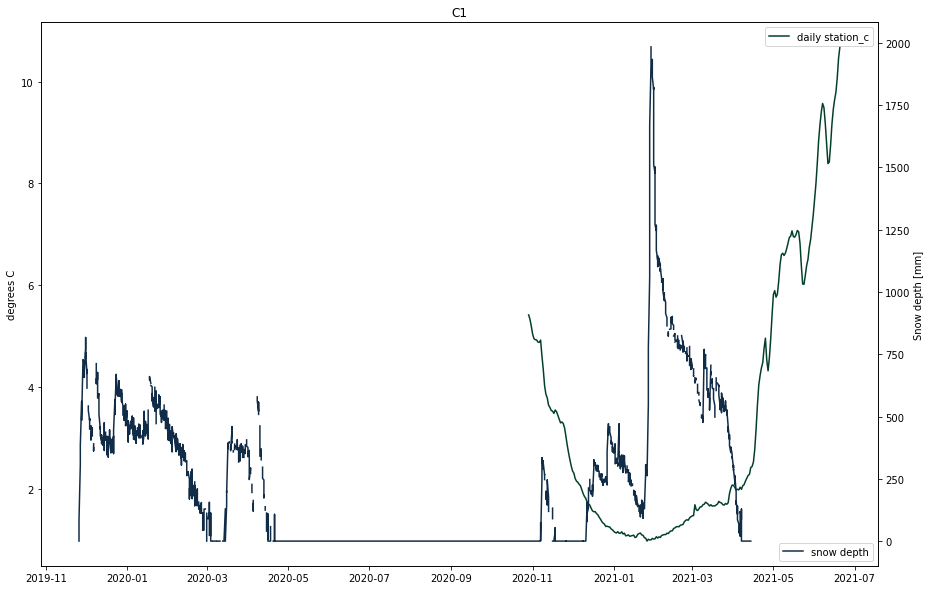

In [19]:

hobo_c = pd.read_csv('hoboC1.csv',header=1)
kh = hobo_c.keys()
hobo_c['dt']=pd.to_datetime(hobo_c[kh[1]])

station_c = pd.read_csv('TableC1.csv',header=0)
station_c['dt'] = pd.to_datetime(station_c['TIMESTAMP'])
ks = station_c.keys()
station_c_wy20 = station_c[station_c['dt']>hobo_b['dt'][0]]
hobo_c_T=pd.Series(hobo_c[kh[2]])
hobo_c_T.index=hobo_c['dt']
station_c_T=pd.Series(station_c_wy20['T_Avg'])
station_c_T.index = station_c_wy20['dt']
station_c_hourly = station_c_T.resample('1H').bfill()
hobo_c_hourly = hobo_c_T.resample('1H').bfill()
station_c_daily = station_c_T.resample('24H').bfill()
hobo_c_daily = hobo_c_T.resample('24H').bfill()
hourly_temps_c = pd.DataFrame(hobo_c_hourly).join(pd.DataFrame(station_c_hourly))
hourly_temps_c.columns=['hobo','station_c']
daily_temps_c = pd.DataFrame(hobo_c_daily).join(pd.DataFrame(station_c_daily))
daily_temps_c.columns=['hobo','station_c']
hourly_temps_c['hobo c'] = (hourly_temps_c['hobo'] - 32) / 1.8  
hourly_temps_c['difference'] = hourly_temps_c['station_c'].astype('float')-hourly_temps_c['hobo c']
series=pd.Series(station_c_wy20['T_Avg'].astype('float'))

daily_temps_c['hobo c'] = (daily_temps_c['hobo'] - 32) / 1.8  
daily_temps_c['difference'] = daily_temps_c['station_c'].astype('float')-daily_temps_c['hobo c']

camera_c = pd.read_csv('snowsummary_shrub.csv',header=2)
camera_c['dt'] = pd.to_datetime(camera_c['Date'])
camera_c_wy20 = camera_c[camera_c['dt']>hobo_c['dt'][0]]
camera_c_wy20.index = camera_c_wy20['dt']

cols = cm.bukavu(np.linspace(0,1,5))
#y = daily_temps_c['hobo c'].astype('float')
#x = daily_temps_c.index

x= station_c_daily.index
f,ax=plt.subplots(figsize=(15,10))
ax2=ax.twinx()
# ax.plot(hourly_temps_c.index,hourly_temps_c['hobo c'],color=cm.grayC(50),label='hobo hourly')
# ax.plot(x,y,color=cols[1],label='hobo daily')
# daily_station_c = daily_temps_c['station_c'].astype('float') #  savgol_filter(hourly_temps_c['station_c'].astype('float'), window_length = 1, polyorder = 1)
# tmp =  daily_station_c - y
ax.plot(x,station_c_daily,color=cols[2],label='daily station_c')
# ax.plot(x,tmp, color=cm.bilbao(255),label = 'daily difference')
ax2.plot(camera_c_wy20['Snow Depth (mm)'],'-',color=cm.oslo(50),label='snow depth')
ax.set_ylabel('degrees C')
ax2.set_ylabel('Snow depth [mm]')
ax.legend()
ax2.legend(loc = 'lower right')
ax.set_title('C1')

C:\Users\Marianne\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,2,4,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


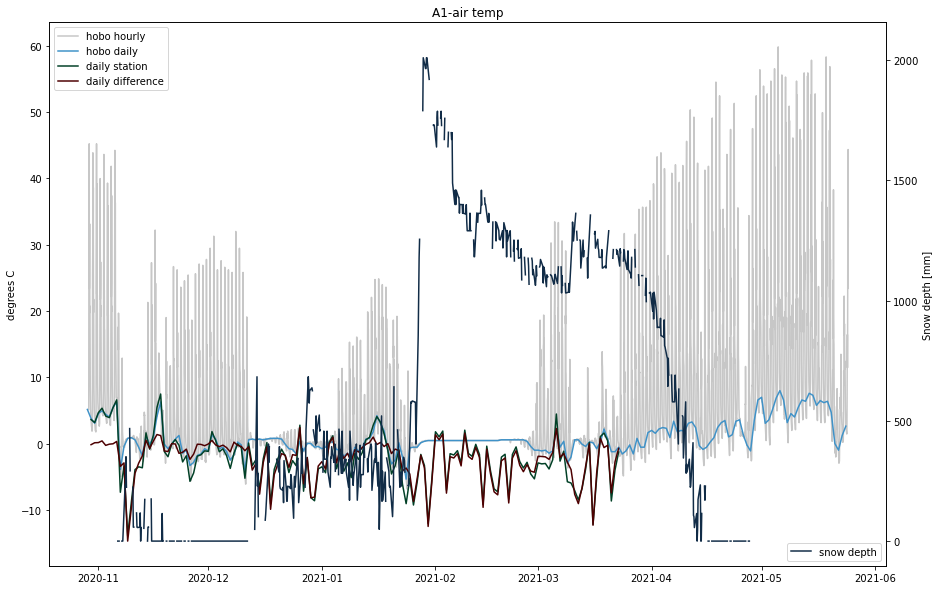

In [20]:

hobo = pd.read_csv('hoboA1.csv',header=1)
kh = hobo.keys()
hobo['dt']=pd.to_datetime(hobo[kh[1]])

station = pd.read_csv('TableA1.csv',header=0)
station['dt'] = pd.to_datetime(station['TIMESTAMP'])
ks = station.keys()
station_wy20 = station[station['dt']>hobo['dt'][0]]
hobo_T=pd.Series(hobo[kh[2]])
hobo_T.index=hobo['dt']
station_T=pd.Series(station_wy20['AirTC_Avg'])
station_T.index = station_wy20['dt']
station_hourly = station_T.resample('1H').bfill()
hobo_hourly = hobo_T.resample('1H').bfill()
station_daily = station_T.resample('24H').bfill()
hobo_daily = hobo_T.resample('24H').bfill()
hourly_temps = pd.DataFrame(hobo_hourly).join(pd.DataFrame(station_hourly))
hourly_temps.columns=['hobo','station']
daily_temps = pd.DataFrame(hobo_daily).join(pd.DataFrame(station_daily))
daily_temps.columns=['hobo','station']
hourly_temps['hobo c'] = (hourly_temps['hobo'] - 32) / 1.8  
hourly_temps['difference'] = hourly_temps['station'].astype('float')-hourly_temps['hobo c']
series=pd.Series(station_wy20['AirTC_Avg'].astype('float'))

daily_temps['hobo c'] = (daily_temps['hobo'] - 32) / 1.8  
daily_temps['difference'] = daily_temps['station'].astype('float')-daily_temps['hobo c']

camera = pd.read_csv('snowsummary_wetland.csv',header=2)
camera['dt'] = pd.to_datetime(camera['Date'])
camera_wy20 = camera[camera['dt']>hobo['dt'][0]]
camera_wy20.index = camera_wy20['dt']


cols = cm.bukavu(np.linspace(0,1,5))
y = daily_temps['hobo c'].astype('float')
x = daily_temps.index

f,ax=plt.subplots(figsize=(15,10))
ax2=ax.twinx()
ax.plot(hourly_temps.index,hourly_temps['hobo c'],color=cm.grayC(50),label='hobo hourly')
ax.plot(x,y,color=cols[1],label='hobo daily')
daily_station = daily_temps['station'].astype('float') #  savgol_filter(hourly_temps['station'].astype('float'), window_length = 1, polyorder = 1)
tmp =  daily_station - y
ax.plot(x,daily_station,color=cols[2],label='daily station')
ax.plot(x,tmp, color=cm.bilbao(255),label = 'daily difference')
ax2.plot(camera_wy20['Snow Depth (mm)'],'-',color=cm.oslo(50),label='snow depth')
ax.set_ylabel('degrees C')
ax2.set_ylabel('Snow depth [mm]')
ax.legend()
ax2.legend(loc = 'lower right')
ax.set_title('A1-air temp')
plt.savefig("snow_temp_a1_air.jpg", dpi=300)